In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
header_list = ["eth-usd", "price", "volume", "timestamp"]
data_2 = pd.read_csv("eth.usd.2018.csv", names = header_list)
data_2 = data_2.truncate(after = 100000)

In [4]:
data_2.head()

,eth-usd,price,volume,timestamp
0,iehx-eth-usd,742.015308,0.296652,1.514765e+09
1,iehx-eth-usd,742.272462,0.000000,1.514765e+09
2,vehx-eth-usd,742.037945,0.000000,1.514765e+09
3,bfnx-eth-usd,736.500000,1.862383,1.514765e+09
4,stmp-eth-usd,743.500000,10.000000,1.514765e+09


In [5]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   eth-usd    100001 non-null  object 
 1   price      100001 non-null  float64
 2   volume     100001 non-null  float64
 3   timestamp  100001 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.1+ MB


In [6]:
symbol = data_2.columns[1]
symbol

'price'

<AxesSubplot:xlabel='timestamp'>

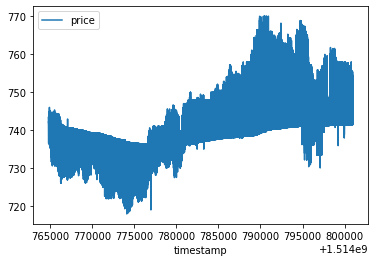

In [7]:
data_2.plot(x ='timestamp', y='price')

In [8]:
data_2[symbol]

0         742.015308
1         742.272462
2         742.037945
3         736.500000
4         743.500000
             ...    
99996     753.010000
99997     753.000000
99998     753.000000
99999     753.000000
100000    752.990000
Name: price, Length: 100001, dtype: float64

In [9]:
data_2['returns'] = np.log(data_2[symbol] / data_2[symbol].shift())

In [10]:
data_2

,eth-usd,price,volume,timestamp,returns
0,iehx-eth-usd,742.015308,0.296652,1.514765e+09,NaN
1,iehx-eth-usd,742.272462,0.000000,1.514765e+09,0.000347
2,vehx-eth-usd,742.037945,0.000000,1.514765e+09,-0.000316
3,bfnx-eth-usd,736.500000,1.862383,1.514765e+09,-0.007491
4,stmp-eth-usd,743.500000,10.000000,1.514765e+09,0.009460
...,...,...,...,...,...
99996,base-eth-usd,753.010000,0.001000,1.514801e+09,-0.000013
99997,base-eth-usd,753.000000,0.270520,1.514801e+09,-0.000013
99998,base-eth-usd,753.000000,0.001000,1.514801e+09,0.000000
99999,base-eth-usd,753.000000,5.000000,1.514801e+09,0.000000


In [11]:
window = 50

In [60]:
# Adding Label/Features
df = data_2.copy()
df['dir'] = np.where(df['returns'] > 0,1,0)
df["sma"] = df[symbol].rolling(window).mean() - df[symbol].rolling(150).mean()
#df["boll"] = (df[symbol] - df[symbol].rolling(window).mean()) / df[symbol].rolling(window) .std()
df["min"] = df[symbol].rolling(window).min() / df[symbol] - 1
df["max"] = df[symbol].rolling(window).max() / df[symbol] - 1
df["mom"] = df["returns"].rolling(3).mean()
df["vol"] = df["returns"].rolling(window).std()
df.dropna(inplace = True)

In [61]:
df

,eth-usd,price,volume,timestamp,returns,dir,sma,min,max,mom,vol
149,iehx-eth-usd,742.377719,2.401876,1.514765e+09,0.000012,1,0.386728,-0.007917,0.002711,0.002650,0.003211
150,base-eth-usd,739.000000,0.400030,1.514765e+09,-0.004560,0,0.344078,-0.003383,0.007294,0.001111,0.003269
151,base-eth-usd,740.030000,0.020000,1.514765e+09,0.001393,1,0.318822,-0.004770,0.005892,-0.001052,0.003275
152,base-eth-usd,740.030000,0.010000,1.514765e+09,0.000000,0,0.290578,-0.004770,0.005892,-0.001056,0.003275
153,base-eth-usd,740.050000,0.020000,1.514765e+09,0.000027,1,0.337911,-0.004797,0.005864,0.000473,0.003090
...,...,...,...,...,...,...,...,...,...,...,...
99996,base-eth-usd,753.010000,0.001000,1.514801e+09,-0.000013,0,1.790497,-0.015320,0.001872,-0.000031,0.003193
99997,base-eth-usd,753.000000,0.270520,1.514801e+09,-0.000013,0,1.830497,-0.015307,0.001886,-0.000009,0.003193
99998,base-eth-usd,753.000000,0.001000,1.514801e+09,0.000000,0,1.871881,-0.015307,0.001886,-0.000009,0.003193
99999,base-eth-usd,753.000000,5.000000,1.514801e+09,0.000000,0,1.855036,-0.015307,0.001886,-0.000004,0.003193


In [62]:
lags = 5

In [63]:
cols = []
features = ["dir", "sma", "min", "max", "mom", "vol"]

In [64]:
for f in features:
    for lag in range(1, lags + 1):
        col = "{}_lag{}".format(f, lag)
        df[col] = df[f].shift(lag)
        cols.append(col)
df.dropna(inplace = True)

In [65]:
df

,eth-usd,price,volume,timestamp,returns,dir,sma,min,max,mom,...,mom_lag1,mom_lag2,mom_lag3,mom_lag4,mom_lag5,vol_lag1,vol_lag2,vol_lag3,vol_lag4,vol_lag5
154,base-eth-usd,740.05,0.01000,1.514765e+09,0.000000,0,0.431911,-0.004797,0.005864,0.000009,...,0.000473,-0.001056,-0.001052,0.001111,0.002650,0.003090,0.003275,0.003275,0.003269,0.003211
155,base-eth-usd,740.05,0.13510,1.514765e+09,0.000000,0,0.427979,-0.004797,0.005864,0.000009,...,0.000009,0.000473,-0.001056,-0.001052,0.001111,0.003090,0.003090,0.003275,0.003275,0.003269
156,base-eth-usd,740.05,0.00200,1.514765e+09,0.000000,0,0.402948,-0.004797,0.005864,0.000000,...,0.000009,0.000009,0.000473,-0.001056,-0.001052,0.002965,0.003090,0.003090,0.003275,0.003275
157,base-eth-usd,740.06,0.02000,1.514765e+09,0.000014,1,0.336466,-0.004810,0.005851,0.000005,...,0.000000,0.000009,0.000009,0.000473,-0.001056,0.002957,0.002965,0.003090,0.003090,0.003275
158,base-eth-usd,740.06,0.01000,1.514765e+09,0.000000,0,0.294533,-0.004810,0.005851,0.000005,...,0.000005,0.000000,0.000009,0.000009,0.000473,0.002957,0.002957,0.002965,0.003090,0.003090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,base-eth-usd,753.01,0.00100,1.514801e+09,-0.000013,0,1.790497,-0.015320,0.001872,-0.000031,...,-0.000035,-0.000053,-0.000239,-0.000279,-0.000283,0.003193,0.003193,0.003193,0.003193,0.003193
99997,base-eth-usd,753.00,0.27052,1.514801e+09,-0.000013,0,1.830497,-0.015307,0.001886,-0.000009,...,-0.000031,-0.000035,-0.000053,-0.000239,-0.000279,0.003193,0.003193,0.003193,0.003193,0.003193
99998,base-eth-usd,753.00,0.00100,1.514801e+09,0.000000,0,1.871881,-0.015307,0.001886,-0.000009,...,-0.000009,-0.000031,-0.000035,-0.000053,-0.000239,0.003193,0.003193,0.003193,0.003193,0.003193
99999,base-eth-usd,753.00,5.00000,1.514801e+09,0.000000,0,1.855036,-0.015307,0.001886,-0.000004,...,-0.000009,-0.000009,-0.000031,-0.000035,-0.000053,0.003193,0.003193,0.003193,0.003193,0.003193


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99847 entries, 154 to 100000
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eth-usd    99847 non-null  object 
 1   price      99847 non-null  float64
 2   volume     99847 non-null  float64
 3   timestamp  99847 non-null  float64
 4   returns    99847 non-null  float64
 5   dir        99847 non-null  int64  
 6   sma        99847 non-null  float64
 7   min        99847 non-null  float64
 8   max        99847 non-null  float64
 9   mom        99847 non-null  float64
 10  vol        99847 non-null  float64
 11  dir_lag1   99847 non-null  float64
 12  dir_lag2   99847 non-null  float64
 13  dir_lag3   99847 non-null  float64
 14  dir_lag4   99847 non-null  float64
 15  dir_lag5   99847 non-null  float64
 16  sma_lag1   99847 non-null  float64
 17  sma_lag2   99847 non-null  float64
 18  sma_lag3   99847 non-null  float64
 19  sma_lag4   99847 non-null  float64
 20  sma

In [67]:
cols

['dir_lag1',
 'dir_lag2',
 'dir_lag3',
 'dir_lag4',
 'dir_lag5',
 'sma_lag1',
 'sma_lag2',
 'sma_lag3',
 'sma_lag4',
 'sma_lag5',
 'min_lag1',
 'min_lag2',
 'min_lag3',
 'min_lag4',
 'min_lag5',
 'max_lag1',
 'max_lag2',
 'max_lag3',
 'max_lag4',
 'max_lag5',
 'mom_lag1',
 'mom_lag2',
 'mom_lag3',
 'mom_lag4',
 'mom_lag5',
 'vol_lag1',
 'vol_lag2',
 'vol_lag3',
 'vol_lag4',
 'vol_lag5']

In [68]:
len(cols)

30

In [69]:
split = int(len(df)*0.66)
split

65899

In [70]:
train = df.iloc[:split].copy()
train

,eth-usd,price,volume,timestamp,returns,dir,sma,min,max,mom,...,mom_lag1,mom_lag2,mom_lag3,mom_lag4,mom_lag5,vol_lag1,vol_lag2,vol_lag3,vol_lag4,vol_lag5
154,base-eth-usd,740.050000,0.010000,1.514765e+09,0.000000e+00,0,0.431911,-0.004797,0.005864,0.000009,...,0.000473,-0.001056,-0.001052,0.001111,0.002650,0.003090,0.003275,0.003275,0.003269,0.003211
155,base-eth-usd,740.050000,0.135100,1.514765e+09,0.000000e+00,0,0.427979,-0.004797,0.005864,0.000009,...,0.000009,0.000473,-0.001056,-0.001052,0.001111,0.003090,0.003090,0.003275,0.003275,0.003269
156,base-eth-usd,740.050000,0.002000,1.514765e+09,0.000000e+00,0,0.402948,-0.004797,0.005864,0.000000,...,0.000009,0.000009,0.000473,-0.001056,-0.001052,0.002965,0.003090,0.003090,0.003275,0.003275
157,base-eth-usd,740.060000,0.020000,1.514765e+09,1.351251e-05,1,0.336466,-0.004810,0.005851,0.000005,...,0.000000,0.000009,0.000009,0.000473,-0.001056,0.002957,0.002965,0.003090,0.003090,0.003275
158,base-eth-usd,740.060000,0.010000,1.514765e+09,0.000000e+00,0,0.294533,-0.004810,0.005851,0.000005,...,0.000005,0.000000,0.000009,0.000009,0.000473,0.002957,0.002957,0.002965,0.003090,0.003090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66048,iehx-eth-usd,755.978377,0.000000,1.514789e+09,3.061745e-08,1,-0.801698,-0.022874,0.000703,-0.000058,...,-0.000173,-0.000011,0.004094,-0.000053,-0.000225,0.005998,0.005998,0.005997,0.005997,0.006051
66049,base-eth-usd,750.950000,0.100000,1.514789e+09,-6.673703e-03,0,-0.789031,-0.016331,0.007404,-0.002223,...,-0.000058,-0.000173,-0.000011,0.004094,-0.000053,0.005998,0.005998,0.005998,0.005997,0.005997
66050,base-eth-usd,750.930000,0.001000,1.514789e+09,-2.663329e-05,0,-0.776631,-0.016305,0.007431,-0.002233,...,-0.002223,-0.000058,-0.000173,-0.000011,0.004094,0.006075,0.005998,0.005998,0.005998,0.005997
66051,base-eth-usd,750.910000,0.676893,1.514789e+09,-2.663400e-05,0,-0.764498,-0.016279,0.007458,-0.002242,...,-0.002233,-0.002223,-0.000058,-0.000173,-0.000011,0.006075,0.006075,0.005998,0.005998,0.005998


In [71]:
test = df.iloc[split:].copy()
test

,eth-usd,price,volume,timestamp,returns,dir,sma,min,max,mom,...,mom_lag1,mom_lag2,mom_lag3,mom_lag4,mom_lag5,vol_lag1,vol_lag2,vol_lag3,vol_lag4,vol_lag5
66053,base-eth-usd,750.86,0.799088,1.514789e+09,-0.000053,0,-0.741031,-0.016213,0.007525,-0.000031,...,-0.000022,-0.002242,-0.002233,-0.002223,-0.000058,0.006075,0.006075,0.006075,0.006075,0.005998
66054,base-eth-usd,750.84,0.009000,1.514789e+09,-0.000027,0,-0.729831,-0.016187,0.007552,-0.000031,...,-0.000031,-0.000022,-0.002242,-0.002233,-0.002223,0.006075,0.006075,0.006075,0.006075,0.006075
66055,base-eth-usd,750.83,1.000000,1.514789e+09,-0.000013,0,-0.718764,-0.016174,0.007565,-0.000031,...,-0.000031,-0.000031,-0.000022,-0.002242,-0.002233,0.006075,0.006075,0.006075,0.006075,0.006075
66056,base-eth-usd,750.77,1.000000,1.514789e+09,-0.000080,0,-0.763898,-0.016095,0.007645,-0.000040,...,-0.000031,-0.000031,-0.000031,-0.000022,-0.002242,0.006075,0.006075,0.006075,0.006075,0.006075
66057,base-eth-usd,750.74,0.001000,1.514789e+09,-0.000040,0,-0.816881,-0.016056,0.007686,-0.000044,...,-0.000040,-0.000031,-0.000031,-0.000031,-0.000022,0.006000,0.006075,0.006075,0.006075,0.006075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,base-eth-usd,753.01,0.001000,1.514801e+09,-0.000013,0,1.790497,-0.015320,0.001872,-0.000031,...,-0.000035,-0.000053,-0.000239,-0.000279,-0.000283,0.003193,0.003193,0.003193,0.003193,0.003193
99997,base-eth-usd,753.00,0.270520,1.514801e+09,-0.000013,0,1.830497,-0.015307,0.001886,-0.000009,...,-0.000031,-0.000035,-0.000053,-0.000239,-0.000279,0.003193,0.003193,0.003193,0.003193,0.003193
99998,base-eth-usd,753.00,0.001000,1.514801e+09,0.000000,0,1.871881,-0.015307,0.001886,-0.000009,...,-0.000009,-0.000031,-0.000035,-0.000053,-0.000239,0.003193,0.003193,0.003193,0.003193,0.003193
99999,base-eth-usd,753.00,5.000000,1.514801e+09,0.000000,0,1.855036,-0.015307,0.001886,-0.000004,...,-0.000009,-0.000009,-0.000031,-0.000035,-0.000053,0.003193,0.003193,0.003193,0.003193,0.003193


In [72]:
train[cols]

,dir_lag1,dir_lag2,dir_lag3,dir_lag4,dir_lag5,sma_lag1,sma_lag2,sma_lag3,sma_lag4,sma_lag5,...,mom_lag1,mom_lag2,mom_lag3,mom_lag4,mom_lag5,vol_lag1,vol_lag2,vol_lag3,vol_lag4,vol_lag5
154,1.0,0.0,1.0,0.0,1.0,0.337911,0.290578,0.318822,0.344078,0.386728,...,0.000473,-0.001056,-0.001052,0.001111,0.002650,0.003090,0.003275,0.003275,0.003269,0.003211
155,0.0,1.0,0.0,1.0,0.0,0.431911,0.337911,0.290578,0.318822,0.344078,...,0.000009,0.000473,-0.001056,-0.001052,0.001111,0.003090,0.003090,0.003275,0.003275,0.003269
156,0.0,0.0,1.0,0.0,1.0,0.427979,0.431911,0.337911,0.290578,0.318822,...,0.000009,0.000009,0.000473,-0.001056,-0.001052,0.002965,0.003090,0.003090,0.003275,0.003275
157,0.0,0.0,0.0,1.0,0.0,0.402948,0.427979,0.431911,0.337911,0.290578,...,0.000000,0.000009,0.000009,0.000473,-0.001056,0.002957,0.002965,0.003090,0.003090,0.003275
158,1.0,0.0,0.0,0.0,1.0,0.336466,0.402948,0.427979,0.431911,0.337911,...,0.000005,0.000000,0.000009,0.000009,0.000473,0.002957,0.002957,0.002965,0.003090,0.003090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66048,1.0,0.0,0.0,1.0,1.0,-0.881410,-0.961121,-1.040790,-1.122256,-1.207190,...,-0.000173,-0.000011,0.004094,-0.000053,-0.000225,0.005998,0.005998,0.005997,0.005997,0.006051
66049,1.0,1.0,0.0,0.0,1.0,-0.801698,-0.881410,-0.961121,-1.040790,-1.122256,...,-0.000058,-0.000173,-0.000011,0.004094,-0.000053,0.005998,0.005998,0.005998,0.005997,0.005997
66050,0.0,1.0,1.0,0.0,0.0,-0.789031,-0.801698,-0.881410,-0.961121,-1.040790,...,-0.002223,-0.000058,-0.000173,-0.000011,0.004094,0.006075,0.005998,0.005998,0.005998,0.005997
66051,0.0,0.0,1.0,1.0,0.0,-0.776631,-0.789031,-0.801698,-0.881410,-0.961121,...,-0.002233,-0.002223,-0.000058,-0.000173,-0.000011,0.006075,0.006075,0.005998,0.005998,0.005998


In [73]:
mu, std = train.mean(), train.std()

In [94]:
mu

price        7.374525e+02
volume       1.294626e+00
timestamp    1.514778e+09
returns      2.208643e-07
dir          4.020547e-01
sma          8.350337e-03
min         -7.912891e-03
max          8.473131e-03
mom          2.214071e-07
vol          5.059674e-03
dir_lag1     4.020698e-01
dir_lag2     4.020698e-01
dir_lag3     4.020850e-01
dir_lag4     4.020850e-01
dir_lag5     4.020850e-01
sma_lag1     8.366884e-03
sma_lag2     8.382895e-03
sma_lag3     8.399518e-03
sma_lag4     8.416712e-03
sma_lag5     8.434746e-03
min_lag1    -7.912716e-03
min_lag2    -7.912542e-03
min_lag3    -7.912367e-03
min_lag4    -7.912170e-03
min_lag5    -7.911943e-03
max_lag1     8.473106e-03
max_lag2     8.473082e-03
max_lag3     8.473059e-03
max_lag4     8.473057e-03
max_lag5     8.473088e-03
mom_lag1     2.289258e-07
mom_lag2     2.469307e-07
mom_lag3     2.648616e-07
mom_lag4     3.154633e-07
mom_lag5     3.565515e-07
vol_lag1     5.059628e-03
vol_lag2     5.059586e-03
vol_lag3     5.059543e-03
vol_lag4    

In [95]:
train - mu

,dir,dir_lag1,dir_lag2,dir_lag3,dir_lag4,dir_lag5,eth-usd,max,max_lag1,max_lag2,...,sma_lag4,sma_lag5,timestamp,vol,vol_lag1,vol_lag2,vol_lag3,vol_lag4,vol_lag5,volume
154,-0.402055,0.59793,-0.40207,0.597915,-0.402085,0.597915,NaN,-0.002609,-0.002609,-0.002581,...,0.335661,0.378293,-12800.156833,-0.001970,-0.001970,-0.001784,-0.001784,-0.001791,-0.001848,-1.284626
155,-0.402055,-0.40207,0.59793,-0.402085,0.597915,-0.402085,NaN,-0.002609,-0.002609,-0.002609,...,0.310405,0.335643,-12800.156833,-0.002094,-0.001970,-0.001970,-0.001784,-0.001784,-0.001791,-1.159526
156,-0.402055,-0.40207,-0.40207,0.597915,-0.402085,0.597915,NaN,-0.002609,-0.002609,-0.002609,...,0.282161,0.310387,-12800.156833,-0.002103,-0.002094,-0.001970,-0.001970,-0.001784,-0.001784,-1.292626
157,0.597945,-0.40207,-0.40207,-0.402085,0.597915,-0.402085,NaN,-0.002622,-0.002609,-0.002609,...,0.329495,0.282143,-12800.156833,-0.002103,-0.002103,-0.002094,-0.001970,-0.001970,-0.001784,-1.274626
158,-0.402055,0.59793,-0.40207,-0.402085,-0.402085,0.597915,NaN,-0.002622,-0.002622,-0.002609,...,0.423495,0.329477,-12800.156833,-0.002112,-0.002103,-0.002103,-0.002094,-0.001970,-0.001970,-1.284626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66048,0.597945,0.59793,-0.40207,-0.402085,0.597915,0.597915,NaN,-0.007770,-0.007770,-0.007766,...,-1.130673,-1.215624,11807.250167,0.000938,0.000938,0.000938,0.000938,0.000938,0.000992,-1.294626
66049,-0.402055,0.59793,0.59793,-0.402085,-0.402085,0.597915,NaN,-0.001069,-0.007770,-0.007770,...,-1.049206,-1.130691,11807.355167,0.001015,0.000938,0.000938,0.000938,0.000938,0.000938,-1.194626
66050,-0.402055,-0.40207,0.59793,0.597915,-0.402085,-0.402085,NaN,-0.001042,-0.001069,-0.007770,...,-0.969538,-1.049224,11807.355167,0.001015,0.001015,0.000938,0.000938,0.000938,0.000938,-1.293626
66051,-0.402055,-0.40207,-0.40207,0.597915,0.597915,-0.402085,NaN,-0.001016,-0.001042,-0.001069,...,-0.889826,-0.969556,11807.355167,0.001015,0.001015,0.001015,0.000938,0.000938,0.000938,-0.617733


In [75]:
train_s = (train - mu) / std

In [76]:
train_s

,dir,dir_lag1,dir_lag2,dir_lag3,dir_lag4,dir_lag5,eth-usd,max,max_lag1,max_lag2,...,sma_lag4,sma_lag5,timestamp,vol,vol_lag1,vol_lag2,vol_lag3,vol_lag4,vol_lag5,volume
154,-0.819990,1.219470,-0.820016,1.219432,-0.820042,1.219432,NaN,-0.442807,-0.442802,-0.438183,...,0.451402,0.508737,-1.791366,-1.100627,-1.100594,-0.996820,-0.996757,-1.000447,-1.032426,-0.169034
155,-0.819990,-0.820016,1.219470,-0.820042,1.219432,-0.820042,NaN,-0.442807,-0.442802,-0.442798,...,0.417438,0.451381,-1.791366,-1.169997,-1.100594,-1.100565,-0.996791,-0.996728,-1.000417,-0.152573
156,-0.819990,-0.820016,-0.820016,1.219432,-0.820042,1.219432,NaN,-0.442807,-0.442802,-0.442798,...,0.379455,0.417416,-1.791366,-1.174915,-1.169964,-1.100565,-1.100535,-0.996762,-0.996698,-0.170087
157,1.219509,-0.820016,-0.820016,-0.820042,1.219432,-0.820042,NaN,-0.445114,-0.442802,-0.442798,...,0.443109,0.379433,-1.791366,-1.174937,-1.174882,-1.169934,-1.100535,-1.100506,-0.996733,-0.167718
158,-0.819990,1.219470,-0.820016,-0.820042,-0.820042,1.219432,NaN,-0.445114,-0.445109,-0.442798,...,0.569522,0.443088,-1.791366,-1.179709,-1.174904,-1.174852,-1.169904,-1.100506,-1.100476,-0.169034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66048,1.219509,1.219470,-0.820016,-0.820042,1.219432,1.219432,NaN,-1.318901,-1.318890,-1.318164,...,-1.520545,-1.634801,1.652410,0.524004,0.524026,0.524048,0.523984,0.523785,0.554163,-0.170350
66049,-0.819990,1.219470,1.219470,-0.820042,-0.820042,1.219432,NaN,-0.181487,-1.318895,-1.318885,...,-1.410988,-1.520580,1.652425,0.567227,0.524026,0.524047,0.524069,0.524005,0.523805,-0.157192
66050,-0.819990,-0.820016,1.219470,1.219432,-0.820042,-0.820042,NaN,-0.176933,-0.181483,-1.318890,...,-1.303848,-1.411022,1.652425,0.567228,0.567248,0.524047,0.524068,0.524090,0.524026,-0.170219
66051,-0.819990,-0.820016,-0.820016,1.219432,1.219432,-0.820042,NaN,-0.172378,-0.176928,-0.181478,...,-1.196651,-1.303882,1.652425,0.567230,0.567250,0.567269,0.524068,0.524089,0.524111,-0.081283


In [77]:
train_s.describe()

,dir,dir_lag1,dir_lag2,dir_lag3,dir_lag4,dir_lag5,max,max_lag1,max_lag2,max_lag3,...,sma_lag4,sma_lag5,timestamp,vol,vol_lag1,vol_lag2,vol_lag3,vol_lag4,vol_lag5,volume
count,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,...,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04,6.589900e+04
mean,1.424099e-14,-9.311183e-15,-9.367466e-15,1.786697e-14,1.775505e-14,1.790766e-14,-1.707962e-14,-5.608022e-15,-1.708873e-14,-1.815216e-14,...,-1.291180e-17,2.730381e-16,5.483605e-09,-1.929699e-14,-1.867562e-14,-1.894989e-14,-1.918321e-14,-1.835037e-14,-1.671060e-14,6.773377e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.199899e-01,-8.200158e-01,-8.200158e-01,-8.200417e-01,-8.200417e-01,-8.200417e-01,-1.438270e+00,-1.438264e+00,-1.438258e+00,-1.438252e+00,...,-6.029839e+00,-6.029906e+00,-1.791366e+00,-2.826697e+00,-2.826652e+00,-2.826614e+00,-2.826576e+00,-2.826538e+00,-2.826497e+00,-1.703501e-01
25%,-8.199899e-01,-8.200158e-01,-8.200158e-01,-8.200417e-01,-8.200417e-01,-8.200417e-01,-8.174111e-01,-8.174060e-01,-8.174009e-01,-8.173960e-01,...,-5.060413e-01,-5.060289e-01,-8.479845e-01,-6.671599e-01,-6.671377e-01,-6.671124e-01,-6.670965e-01,-6.670867e-01,-6.670701e-01,-1.703501e-01
50%,-8.199899e-01,-8.200158e-01,-8.200158e-01,-8.200417e-01,-8.200417e-01,-8.200417e-01,-3.861014e-02,-3.860595e-02,-3.860187e-02,-3.859786e-02,...,3.033307e-02,3.031969e-02,3.603935e-02,-5.398339e-02,-5.398902e-02,-5.399098e-02,-5.396871e-02,-5.394611e-02,-5.410863e-02,-1.664620e-01
75%,1.219509e+00,1.219470e+00,1.219470e+00,1.219432e+00,1.219432e+00,1.219432e+00,6.663142e-01,6.663175e-01,6.663207e-01,6.663238e-01,...,5.408887e-01,5.408682e-01,8.565215e-01,6.814994e-01,6.815201e-01,6.815403e-01,6.815606e-01,6.815809e-01,6.816004e-01,-7.907991e-02
max,1.219509e+00,1.219470e+00,1.219470e+00,1.219432e+00,1.219432e+00,1.219432e+00,4.484473e+00,4.484472e+00,4.484470e+00,4.484469e+00,...,6.961204e+00,6.961228e+00,1.652425e+00,4.824797e+00,4.824790e+00,4.824789e+00,4.824788e+00,4.824787e+00,4.824782e+00,1.871740e+02


In [78]:
from DNN_Model import *

In [79]:
set_seeds(100)
model = create_model(hl=3, hu=50, dropout = True, input_dim=len(cols))
model.fit(x=train_s[cols], y = train["dir"], epochs=50, verbose=False,
        validation_split=0.2, shuffle = False, class_weight=cw(train))

In [88]:
model.evaluate(train_s[cols], train["dir"])

65899/65899 [==============================] - 1s 18us/step


[0.6074541053196142, 0.6627566427434257]

In [89]:
train_s

,dir,dir_lag1,dir_lag2,dir_lag3,dir_lag4,dir_lag5,eth-usd,max,max_lag1,max_lag2,...,sma_lag4,sma_lag5,timestamp,vol,vol_lag1,vol_lag2,vol_lag3,vol_lag4,vol_lag5,volume
154,-0.819990,1.219470,-0.820016,1.219432,-0.820042,1.219432,NaN,-0.442807,-0.442802,-0.438183,...,0.451402,0.508737,-1.791366,-1.100627,-1.100594,-0.996820,-0.996757,-1.000447,-1.032426,-0.169034
155,-0.819990,-0.820016,1.219470,-0.820042,1.219432,-0.820042,NaN,-0.442807,-0.442802,-0.442798,...,0.417438,0.451381,-1.791366,-1.169997,-1.100594,-1.100565,-0.996791,-0.996728,-1.000417,-0.152573
156,-0.819990,-0.820016,-0.820016,1.219432,-0.820042,1.219432,NaN,-0.442807,-0.442802,-0.442798,...,0.379455,0.417416,-1.791366,-1.174915,-1.169964,-1.100565,-1.100535,-0.996762,-0.996698,-0.170087
157,1.219509,-0.820016,-0.820016,-0.820042,1.219432,-0.820042,NaN,-0.445114,-0.442802,-0.442798,...,0.443109,0.379433,-1.791366,-1.174937,-1.174882,-1.169934,-1.100535,-1.100506,-0.996733,-0.167718
158,-0.819990,1.219470,-0.820016,-0.820042,-0.820042,1.219432,NaN,-0.445114,-0.445109,-0.442798,...,0.569522,0.443088,-1.791366,-1.179709,-1.174904,-1.174852,-1.169904,-1.100506,-1.100476,-0.169034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66048,1.219509,1.219470,-0.820016,-0.820042,1.219432,1.219432,NaN,-1.318901,-1.318890,-1.318164,...,-1.520545,-1.634801,1.652410,0.524004,0.524026,0.524048,0.523984,0.523785,0.554163,-0.170350
66049,-0.819990,1.219470,1.219470,-0.820042,-0.820042,1.219432,NaN,-0.181487,-1.318895,-1.318885,...,-1.410988,-1.520580,1.652425,0.567227,0.524026,0.524047,0.524069,0.524005,0.523805,-0.157192
66050,-0.819990,-0.820016,1.219470,1.219432,-0.820042,-0.820042,NaN,-0.176933,-0.181483,-1.318890,...,-1.303848,-1.411022,1.652425,0.567228,0.567248,0.524047,0.524068,0.524090,0.524026,-0.170219
66051,-0.819990,-0.820016,-0.820016,1.219432,1.219432,-0.820042,NaN,-0.172378,-0.176928,-0.181478,...,-1.196651,-1.303882,1.652425,0.567230,0.567250,0.567269,0.524068,0.524089,0.524111,-0.081283


In [90]:
train_s[cols].head()

,dir_lag1,dir_lag2,dir_lag3,dir_lag4,dir_lag5,sma_lag1,sma_lag2,sma_lag3,sma_lag4,sma_lag5,...,mom_lag1,mom_lag2,mom_lag3,mom_lag4,mom_lag5,vol_lag1,vol_lag2,vol_lag3,vol_lag4,vol_lag5
154,1.219470,-0.820016,1.219432,-0.820042,1.219432,0.443167,0.379495,0.417458,0.451402,0.508737,...,0.244141,-0.545041,-0.542988,0.573477,1.367317,-1.100594,-0.996820,-0.996757,-1.000447,-1.032426
155,-0.820016,1.219470,-0.820042,1.219432,-0.820042,0.569577,0.443148,0.379475,0.417438,0.451381,...,0.004531,0.244134,-0.545054,-0.543018,0.573448,-1.100594,-1.100565,-0.996791,-0.996728,-1.000417
156,-0.820016,-0.820016,1.219432,-0.820042,1.219432,0.564288,0.569559,0.443129,0.379455,0.417416,...,0.004531,0.004522,0.244127,-0.545084,-0.543032,-1.169964,-1.100565,-1.100535,-0.996762,-0.996698
157,-0.820016,-0.820016,-0.820042,1.219432,-0.820042,0.530627,0.564271,0.569541,0.443109,0.379433,...,-0.000118,0.004522,0.004513,0.244102,-0.545098,-1.174882,-1.169934,-1.100535,-1.100506,-0.996733
158,1.219470,-0.820016,-0.820042,-0.820042,1.219432,0.441223,0.530609,0.564252,0.569522,0.443088,...,0.002206,-0.000127,0.004513,0.004487,0.244078,-1.174904,-1.174852,-1.169904,-1.100506,-1.100476


In [91]:
pred = model.predict(train_s[cols])
pred

array([[0.4978092 ],
       [0.58494216],
       [0.48692775],
       ...,
       [0.6012228 ],
       [0.61260337],
       [0.6018319 ]], dtype=float32)

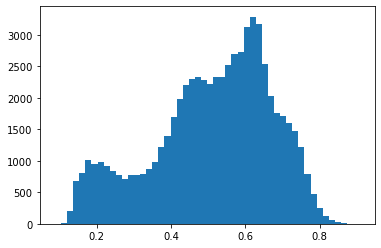

In [84]:
plt.hist(pred, bins = 50)
plt.show()

In [85]:
test

,eth-usd,price,volume,timestamp,returns,dir,sma,min,max,mom,...,mom_lag1,mom_lag2,mom_lag3,mom_lag4,mom_lag5,vol_lag1,vol_lag2,vol_lag3,vol_lag4,vol_lag5
66053,base-eth-usd,750.86,0.799088,1.514789e+09,-0.000053,0,-0.741031,-0.016213,0.007525,-0.000031,...,-0.000022,-0.002242,-0.002233,-0.002223,-0.000058,0.006075,0.006075,0.006075,0.006075,0.005998
66054,base-eth-usd,750.84,0.009000,1.514789e+09,-0.000027,0,-0.729831,-0.016187,0.007552,-0.000031,...,-0.000031,-0.000022,-0.002242,-0.002233,-0.002223,0.006075,0.006075,0.006075,0.006075,0.006075
66055,base-eth-usd,750.83,1.000000,1.514789e+09,-0.000013,0,-0.718764,-0.016174,0.007565,-0.000031,...,-0.000031,-0.000031,-0.000022,-0.002242,-0.002233,0.006075,0.006075,0.006075,0.006075,0.006075
66056,base-eth-usd,750.77,1.000000,1.514789e+09,-0.000080,0,-0.763898,-0.016095,0.007645,-0.000040,...,-0.000031,-0.000031,-0.000031,-0.000022,-0.002242,0.006075,0.006075,0.006075,0.006075,0.006075
66057,base-eth-usd,750.74,0.001000,1.514789e+09,-0.000040,0,-0.816881,-0.016056,0.007686,-0.000044,...,-0.000040,-0.000031,-0.000031,-0.000031,-0.000022,0.006000,0.006075,0.006075,0.006075,0.006075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,base-eth-usd,753.01,0.001000,1.514801e+09,-0.000013,0,1.790497,-0.015320,0.001872,-0.000031,...,-0.000035,-0.000053,-0.000239,-0.000279,-0.000283,0.003193,0.003193,0.003193,0.003193,0.003193
99997,base-eth-usd,753.00,0.270520,1.514801e+09,-0.000013,0,1.830497,-0.015307,0.001886,-0.000009,...,-0.000031,-0.000035,-0.000053,-0.000239,-0.000279,0.003193,0.003193,0.003193,0.003193,0.003193
99998,base-eth-usd,753.00,0.001000,1.514801e+09,0.000000,0,1.871881,-0.015307,0.001886,-0.000009,...,-0.000009,-0.000031,-0.000035,-0.000053,-0.000239,0.003193,0.003193,0.003193,0.003193,0.003193
99999,base-eth-usd,753.00,5.000000,1.514801e+09,0.000000,0,1.855036,-0.015307,0.001886,-0.000004,...,-0.000009,-0.000009,-0.000031,-0.000035,-0.000053,0.003193,0.003193,0.003193,0.003193,0.003193


In [86]:
test_s = (test - mu) / std

In [87]:
model.evaluate(test_s[cols], test["dir"])

33948/33948 [==============================] - 1s 18us/step


[0.6035302833637416, 0.6547955696948273]

In [39]:
pred = model.predict(test_s[cols])
pred

array([[0.53178823],
       [0.2636581 ],
       [0.2045533 ],
       ...,
       [0.14559777],
       [0.14634135],
       [0.15173651]], dtype=float32)

(array([   3.,   14.,   42.,   78.,  204.,  727.,  920.,  727.,  531.,
         448.,  524.,  501.,  510.,  615.,  586.,  669.,  689.,  858.,
         930., 1076., 1171., 1300., 1323., 1456., 1443., 1327., 1346.,
        1308., 1255., 1189., 1154., 1100., 1091., 1085.,  974.,  960.,
         750.,  572.,  418.,  338.,  286.,  318.,  232.,  227.,  227.,
         214.,  146.,   68.,   13.,    5.]),
 array([0.0497779 , 0.06736392, 0.08494994, 0.10253596, 0.12012198,
        0.137708  , 0.15529402, 0.17288004, 0.19046606, 0.20805208,
        0.2256381 , 0.24322413, 0.26081014, 0.27839616, 0.29598218,
        0.3135682 , 0.33115423, 0.34874025, 0.36632627, 0.3839123 ,
        0.40149832, 0.41908434, 0.43667036, 0.4542564 , 0.4718424 ,
        0.4894284 , 0.50701445, 0.52460045, 0.5421865 , 0.5597725 ,
        0.57735854, 0.59494454, 0.6125306 , 0.6301166 , 0.6477026 ,
        0.6652886 , 0.6828746 , 0.7004607 , 0.71804667, 0.7356327 ,
        0.7532187 , 0.77080476, 0.78839076, 0.8059768 , 

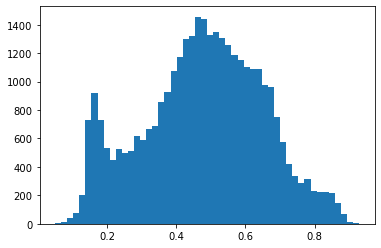

In [40]:
plt.hist(pred, bins = 50)

In [41]:
test["proba"] = model.predict(test_s[cols])

In [42]:
test["position"] = np.where(test.proba < 0.47, -1, np.nan)

In [43]:
test["position"] = np.where(test.proba > 0.53, 1, test.position)

In [44]:
test["position"] = test.position.ffill()

In [45]:
test.position.value_counts(dropna = False)

-1.0    17935
 1.0    16013
Name: position, dtype: int64

In [46]:
test["strategy"] = test["position"] * test["returns"]

In [47]:
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)

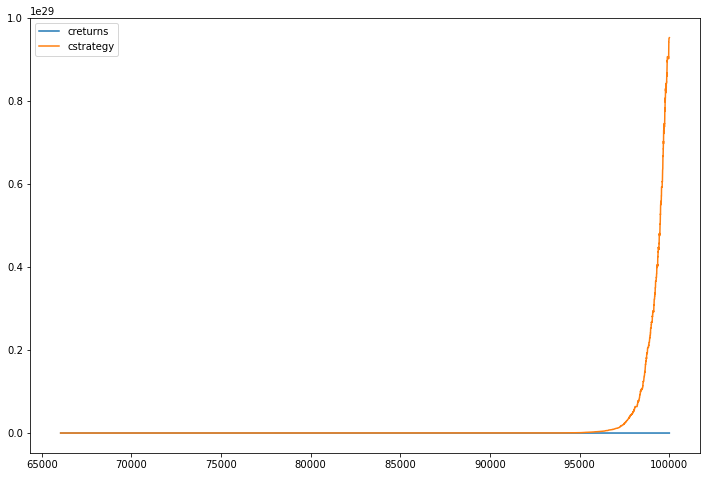

In [48]:
test[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()